## 8-1 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

## 8-3 워드 클라우드

In [1]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

* 이상한 나라의 앨리스

In [2]:
text = open('../09. alice.txt').read()
alice_mask = np.array(Image.open('../09. alice_mask.png'))

stopwords = set(STOPWORDS)  # count에서 제외하고 싶은 단어 저장
stopwords.add('said')

In [3]:
import matplotlib.pyplot as plt
import platform

path = 'C:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin' :
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows' :
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else :
    print('Unknown system...')

%matplotlib inline

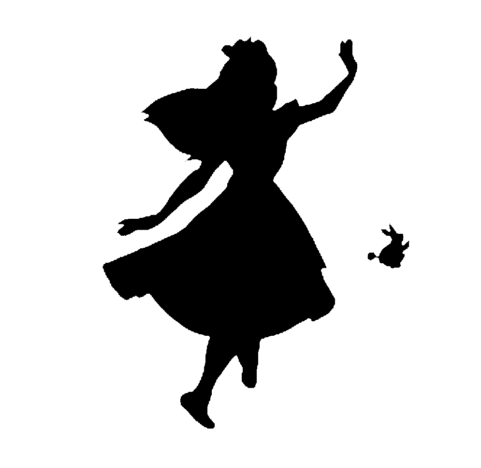

In [4]:
plt.figure(figsize = (8,8))
plt.imshow(alice_mask, cmap = plt.cm.gray, interpolation = 'bilinear')
plt.axis('off')
plt.show()

- Available `colormap` values :  

    Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, 
    CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, 
    OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, 
    Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, 
    PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, 
    RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, 
    Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, 
    Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r,
    YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, 
    autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r,
    cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, 
    cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, 
    gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, 
    gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, 
    gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, 
    magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r,
    pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, 
    spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
    terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, 
    viridis, viridis_r, winter, winter_r

In [5]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
               stopwords=stopwords, colormap='Spectral')
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

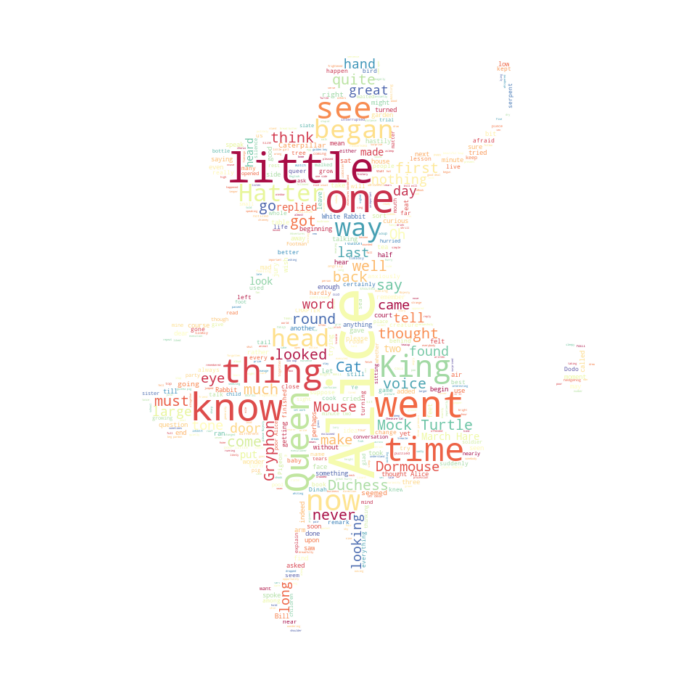

In [6]:
plt.figure(figsize = (12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

* 스타워즈

In [7]:
text = open('../09. a_new_hope.txt').read()
text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')
mask = np.array(Image.open('../09. stormtrooper_mask.png'))

In [8]:
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

In [9]:
wc = WordCloud(max_words = 1000, mask = mask, stopwords = stopwords, 
               margin = 10, random_state = 1).generate(text)
default_colors = wc.to_array()

In [10]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs) :
    return 'hsl(0,0%%,%d%%)' % random.randint(60,100)

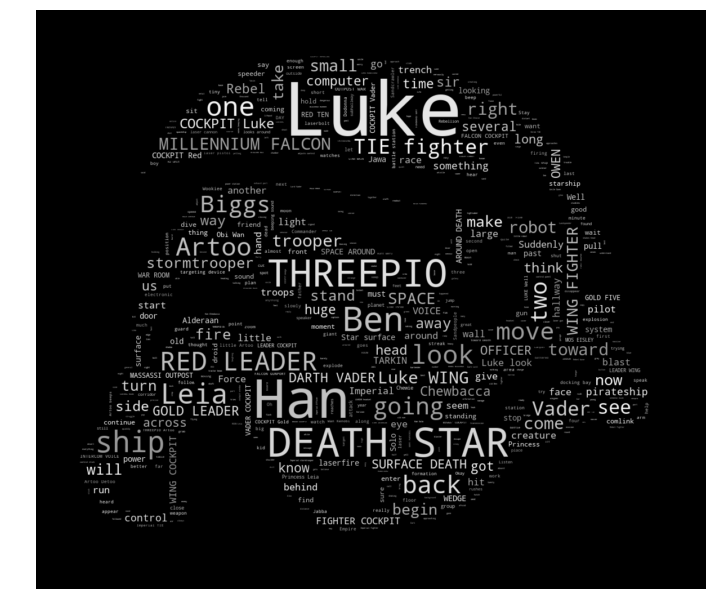

In [11]:
plt.figure(figsize = (12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation='bilinear')
plt.axis('off')
plt.show()

* Avengers : Endgame

In [12]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from selenium import webdriver

In [13]:
driver = webdriver.Chrome('C:/Users/jeong/Documents/JUPYTER NOTEBOOK/selenium_driver/chromedriver')
driver.implicitly_wait(3)

driver.get('https://www.imdb.com/title/tt4154796/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=0')

In [14]:
xpath = '//*[@id="load-more-trigger"]'
i = 1
while i < 20 :
    driver.find_element_by_xpath(xpath).click()
    i = i + 1

In [15]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [16]:
reviews = soup.find_all('div','text show-more__control')
reviews[:3]

[<div class="text show-more__control">If you're going to watch this movie, avoid any spoilers, even spoiler free reviews.
 Which is why I'm not going to say anything about the movie. Not even my opinion. All I'm going to say is:<br/><br/>The crowd applauded 3 times during the movie, and stood up to clap their hands after. This I have never witnessed in a Dutch cinema. Dutch crowds aren't usually passionate about this. I checked the row where I was sitting, and people were crying. After the movie, I was seeing people with smudged mascara. That's all I have to say about the movie.</div>,
 <div class="text show-more__control">Absolute perfection end game !! Good acting performance to all the characters. Great cgi's. Truly epic &amp; perfect ending to a long journey of marvel movie. Go see it you wont regret it !! Perfection Marvel Endgame !!</div>,
 <div class="text show-more__control">Avengers: Endgame is above all the best Marvel superhero movie to date. This is also the best and epic c

In [17]:
driver.close()

In [18]:
len(reviews)

409

In [19]:
for review in range(3) :
    print(reviews[review].get_text().strip())

If you're going to watch this movie, avoid any spoilers, even spoiler free reviews.
Which is why I'm not going to say anything about the movie. Not even my opinion. All I'm going to say is:The crowd applauded 3 times during the movie, and stood up to clap their hands after. This I have never witnessed in a Dutch cinema. Dutch crowds aren't usually passionate about this. I checked the row where I was sitting, and people were crying. After the movie, I was seeing people with smudged mascara. That's all I have to say about the movie.
Absolute perfection end game !! Good acting performance to all the characters. Great cgi's. Truly epic & perfect ending to a long journey of marvel movie. Go see it you wont regret it !! Perfection Marvel Endgame !!
Avengers: Endgame is above all the best Marvel superhero movie to date. This is also the best and epic conclusion to the 21 movies in the first 10 years of the MCU. This is the epic culmination. The best storytelling ever told.


In [20]:
review_list = []
for review in range(len(reviews)) :
    review_list.append(reviews[review].get_text().strip().replace('\n','').replace('\t','').replace('\r',''))

In [21]:
review_list[:3]

["If you're going to watch this movie, avoid any spoilers, even spoiler free reviews.Which is why I'm not going to say anything about the movie. Not even my opinion. All I'm going to say is:The crowd applauded 3 times during the movie, and stood up to clap their hands after. This I have never witnessed in a Dutch cinema. Dutch crowds aren't usually passionate about this. I checked the row where I was sitting, and people were crying. After the movie, I was seeing people with smudged mascara. That's all I have to say about the movie.",
 "Absolute perfection end game !! Good acting performance to all the characters. Great cgi's. Truly epic & perfect ending to a long journey of marvel movie. Go see it you wont regret it !! Perfection Marvel Endgame !!",
 'Avengers: Endgame is above all the best Marvel superhero movie to date. This is also the best and epic conclusion to the 21 movies in the first 10 years of the MCU. This is the epic culmination. The best storytelling ever told.']

In [22]:
file=open('../avengers.txt','w', encoding='utf-8')
for review in review_list:
    file.write(review + '\n')
file.close()

In [23]:
text = open('../avengers.txt', encoding='utf-8').read()
mask = np.array(Image.open('../captain_america.jpg'))
stopwords = set(STOPWORDS)  # count에서 제외하고 싶은 단어 저장
stopwords.add('movie')
stopwords.add('film')

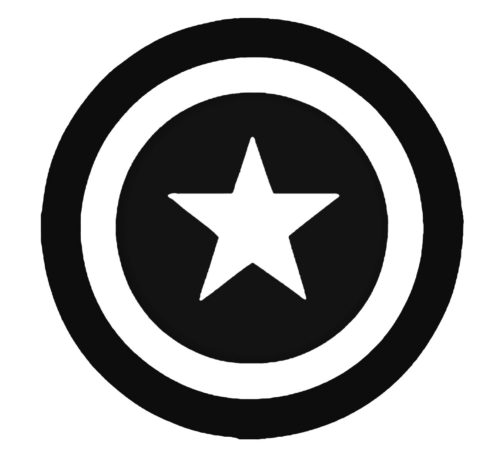

In [24]:
plt.figure(figsize = (8,8))
plt.imshow(mask, cmap = plt.cm.gray, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [25]:
wc = WordCloud(background_color='white', max_words=400, mask=mask,
               stopwords = stopwords, colormap='RdBu')
wc = wc.generate(text)
wc.words_

{'Marvel': 1.0,
 'one': 0.9829059829059829,
 'Infinity War': 0.8888888888888888,
 'will': 0.8290598290598291,
 'character': 0.7863247863247863,
 'time': 0.7692307692307693,
 'good': 0.7521367521367521,
 'movie': 0.717948717948718,
 'end': 0.5897435897435898,
 'watch': 0.5555555555555556,
 'see': 0.5555555555555556,
 'much': 0.5555555555555556,
 'many': 0.5470085470085471,
 'best': 0.5128205128205128,
 'really': 0.5042735042735043,
 'year': 0.48717948717948717,
 'Endgame': 0.47863247863247865,
 'great': 0.46153846153846156,
 'hour': 0.4444444444444444,
 'made': 0.4444444444444444,
 'ending': 0.42735042735042733,
 'Avenger': 0.42735042735042733,
 'even': 0.4188034188034188,
 'story': 0.4188034188034188,
 'boring': 0.4188034188034188,
 'better': 0.4017094017094017,
 'MCU': 0.38461538461538464,
 'fan': 0.38461538461538464,
 'action': 0.38461538461538464,
 'long': 0.36752136752136755,
 'felt': 0.36752136752136755,
 'people': 0.3504273504273504,
 'way': 0.3504273504273504,
 'make': 0.3418803

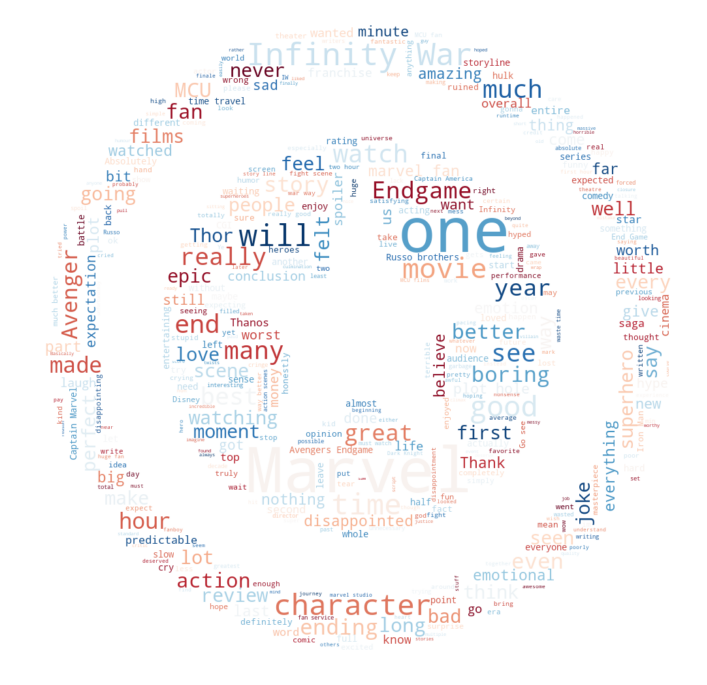

In [26]:
plt.figure(figsize = (12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()